In [1]:
from replica_processor import *
import random

# Turn off chained assignment message
pd.options.mode.chained_assignment = None  # default='warn'

Welcome to JupyROOT 6.24/06


In [11]:
def gen_rand_hotspot(hist):
    
    # Randomly select an eta coordinate from the histogram
    rand_x_coord = random.randint(0,99) 
    
    # Randomly select a phi coordinate from the histogram
    rand_y_coord = random.randint(0,65)
    
    # Get a handle for the intervals of the strip from which the eta coordinate comes from
    strip_vals = hist[hist['x']==rand_x_coord]['occ']
    
    try:
        # Use that list of values from the strip to calculate 3 times the standard deviation
        three_times_strip_stdev = 3*strip_vals.std()
    except:
        three_times_strip_stdev = 1
    
    try:
        # Use that same list of values to calculate 4 times the standard deviation
        four_times_strip_stdev = 4*strip_vals.std()
    except:
        four_times_strip_stdev = 1
    
    # Generate a random hotspot that is between 3 and 4 standard deviations above the occupancy value that is
    # initially at the eta,phi coordinate
    try:
        rand_hotval_occ = random.randint(round(three_times_strip_stdev),round(four_times_strip_stdev))
    except:
        # Sometimes, the standard deviation comes out as an erroneous float NaN which throws an error, this
        # catches that issue
        rand_hotval_occ = 1
    
    # Return the (eta,phi,hotspot_value) as (rand_x_coord, rand_y_coord, rand_hotval_occ)
    return (rand_x_coord, rand_y_coord, rand_hotval_occ)

def gen_rand_hotstrip(hist):
   
    
    rand_start_x_coord = random.randint(0,99)
    
    rand_stop_x_coord = random.randint(0,99)
    while rand_start_x_coord == rand_stop_x_coord:
        rand_stop_x_coord = random.randint(0,99)
    
    rand_y_coord = random.randint(0,65)
    
    # If the ending coordinate is larger than the starting coordinate
    if rand_start_x_coord < rand_stop_x_coord:
        # And the difference between the two coordinates is greater than 10
        if (rand_stop_x_coord-rand_start_x_coord) > 10:
            # Cap the length of the layer to 10
            rand_x_arr = np.arange(rand_start_x_coord,rand_start_x_coord+(10-1))
        else:
            # Otherwise, let the length of the layer be defined by the stop coordinate
            rand_x_arr = np.arange(rand_start_x_coord,rand_stop_x_coord)
    else: # If the start coordinate is larger
        # And if the difference between the two coordinates is greater than 10
        if (rand_start_x_coord-rand_stop_x_coord) > 10:
            # Cap the length of the layer to 10
            rand_x_arr = np.arange(rand_stop_x_coord,rand_stop_x_coord+(10-1))    
        else:
            # Otherwise, let the length of the layer be defined by the start coordinate
            rand_x_arr = np.arange(rand_stop_x_coord,rand_start_x_coord)
    
    # Get a handle for the intervals of the strip from which the eta coordinate comes from
    strip_vals = hist[hist['x']==rand_start_x_coord]['occ'].values
    
    try:
        # Use that list of values from the strip to calculate 3 times the standard deviation
        three_times_strip_stdev = 3*strip_vals.std()
    except:
        three_times_strip_stdev = 1
    
    try:
        # Use that same list of values to calculate 4 times the standard deviation
        four_times_strip_stdev = 4*strip_vals.std()
    except:
        four_times_strip_stdev = 1
    
    # Generate a random hotspot that is between 3 and 4 standard deviations above the occupancy value that is
    # initially at the eta,phi coordinate
    try:
        rand_hotval_occ = random.randint(round(three_times_strip_stdev),round(four_times_strip_stdev))
    except:
        # Sometimes, the standard deviation comes out as an erroneous float NaN which throws an error, this
        # catches that issue
#         print(strip_vals.std())
        rand_hotval_occ = 1
    
    # Return the (eta,phi,hotspot_value) as (rand_x_coord, rand_y_coord, rand_hotval_occ)
    return (rand_x_arr, rand_y_coord, rand_hotval_occ)  


def gen_rand_hotlayer(hist):
    
    
    rand_start_x_coord = random.randint(0,99)
    
    
    rand_stop_x_coord = random.randint(0,99)
    while rand_start_x_coord == rand_stop_x_coord:
        rand_stop_x_coord = random.randint(0,99)
    
    
    rand_start_y_coord = random.randint(0,65)
    

    rand_stop_y_coord = random.randint(0,65)
    while rand_start_y_coord == rand_stop_y_coord:
        rand_stop_y_coord = random.randint(0,65)
    

    # If the ending coordinate is larger than the starting coordinate
    if rand_start_x_coord < rand_stop_x_coord:
        # And the difference between the two coordinates is greater than 10
        if (rand_stop_x_coord-rand_start_x_coord) > 10:
            # Cap the length of the layer to 10
            rand_x_arr = np.arange(rand_start_x_coord,rand_start_x_coord+(10-1))
        else:
            # Otherwise, let the length of the layer be defined by the stop coordinate
            rand_x_arr = np.arange(rand_start_x_coord,rand_stop_x_coord)
    else: # If the start coordinate is larger
        # And if the difference between the two coordinates is greater than 10
        if (rand_start_x_coord-rand_stop_x_coord) > 10:
            # Cap the length of the layer to 10
            rand_x_arr = np.arange(rand_stop_x_coord,rand_stop_x_coord+(10-1))    
        else:
            # Otherwise, let the length of the layer be defined by the start coordinate
            rand_x_arr = np.arange(rand_stop_x_coord,rand_start_x_coord)
    
    # Likewise for y, but capped at 3
    if rand_start_y_coord < rand_stop_y_coord:
        if (rand_stop_y_coord-rand_start_y_coord) > 3:
            rand_y_arr = np.arange(rand_start_y_coord,rand_start_y_coord+(3-1))
        else:
            rand_y_arr = np.arange(rand_start_y_coord,rand_stop_y_coord)
    else:
        if (rand_start_y_coord-rand_stop_y_coord) > 3:
            rand_y_arr = np.arange(rand_stop_y_coord,rand_stop_y_coord+(3-1))
        else:
            rand_y_arr = np.arange(rand_stop_y_coord,rand_start_y_coord)
    
    # Get a handle for the intervals of the strip from which the eta coordinate comes from
    strip_vals = hist[hist['x']==rand_start_x_coord]['occ'].values
    
    try:
        # Use that list of values from the strip to calculate 3 times the standard deviation
        three_times_strip_stdev = 3*strip_vals.std()
    except:
        three_times_strip_stdev = 1
    
    try:
        # Use that same list of values to calculate 4 times the standard deviation
        four_times_strip_stdev = 4*strip_vals.std()
    except:
        four_times_strip_stdev = 1
    
    # Generate a random hotspot that is between 3 and 4 standard deviations above the occupancy value that is
    # initially at the eta,phi coordinate
    try:
        rand_hotval_occ = random.randint(round(three_times_strip_stdev),round(four_times_strip_stdev))
    except:
#         print(strip_vals.std())
          rand_hotval_occ = 1
    
    # Return the (eta,phi,hotspot_value) as (rand_x_coord, rand_y_coord, rand_hotval_occ)
    return (rand_x_arr, rand_y_arr, rand_hotval_occ)



def gen_rand_coldspot():
    # same as hotspot but subtract the std instead of add?
    return

# For Debugging
def input_heatmap(df,ftag_id,hist_id):
    tmp = df[df['ftag_id']==ftag_id]
    tmp = tmp[tmp['hist_id']==hist_id]
    sns.heatmap( tmp.pivot_table(index='y',columns='x',values='occ') )
    plt.show()

In [60]:
df = pd.read_csv('main_dfs.csv', dtype={'x':'int8','y':'int8','ftag_id':'int8','occ':'float32','hist_type':'int8','hist_id':'int16'})
df

,paths,x,y,occ,ftag_id,hist_type,hist_id
0,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,0,0.0,0,0,0
1,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,1,0.0,0,0,0
2,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,2,0.0,0,0,0
3,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,3,0.0,0,0,0
4,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,4,0.0,0,0,0
...,...,...,...,...,...,...,...
41235475,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,60,0.0,84,17,233
41235476,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,61,0.0,84,17,233
41235477,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,62,0.0,84,17,233
41235478,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,63,0.0,84,17,233


In [61]:
df['quality']=0
df['quality'].value_counts()

0    41235480
Name: quality, dtype: int64

In [62]:
# Declare the number of anomalies to generate per single histogram that has been tagged for anomaly generation
gen_num = 500

# Debugging
# pass_counter=0

for idf,ftid in enumerate(df['ftag_id'].unique()):
    # Debugging
#     if idf>0:
#         break
    
    progress_bar(idf,df['ftag_id'].unique())
    
    # Get the subset of the main dataframe whose ftag_id is ftid
    mask = df['ftag_id'] == ftid
    tmp = df.loc[mask,:]
    
    for idh,hid in enumerate(tmp['hist_id'].unique()):
        # Debugging
#         if idh>0:
#             break
        
        # Get the subset of the ftag_id dataframe whose hist_id is hid
        mask = tmp['hist_id'] == hid
        tmp2 = tmp.loc[mask,:]

        # 0 = do not generate anomaly in this histogram, 1 = generate anomaly in this histogram 
        #(50% of histograms should contain anomalies)
        rand_5050 = random.randint(0,1)

        # If its 1, generate an anomaly in the histogram
        if rand_5050 == 1:
            
            
            # Because we want to generate many anomalies, loop over the anomalies to generate
            for ith_anom in range(gen_num):
                
                
                # 1 = hotspot, 2 = hotstrip, 3 = hotlayer (33% of anomalies could be either)
                rand_1in3 = random.randint(1,3)

                if rand_1in3 == 1:

                    # Generate the hotspot with the function
                    hotspot = gen_rand_hotspot(tmp2)

                    # Get a subset of datapoints for the hotspot based on generated coordinates
                    tmpx = tmp2[tmp2['x']==hotspot[0]]
                    tmpy = tmpx[tmpx['y']==hotspot[1]]

                    # Get the indexes that will be used to update the hotspot in the histogram
                    index_to_change = tmpy.index

                    # Update the data point(s) in the histogram based on the hotspot that we generated
                    # The std needs to be added to the original occupancy value to be higher than the avg occ
                    tmp2.loc[index_to_change,'occ'] = tmp2.loc[index_to_change,'occ']+hotspot[2]

                    # If the occupancy(ies) is/are 0...
                    # The std of 0 is 0, so instead of changing an occ to an anomaly and it staying 0, we switch
                    # the value of the 0 occupancy to the highest occ value in the histogram
                    try:
                        if tmp2.loc[index_to_change,'occ'].values[0] == 0:

                            # Switch the value with the max occupancy on the histogram to ensure it is an anomaly
                            tmp2.loc[index_to_change,'occ'] = tmp2['occ'].max()

                        # Update the label in the dataframe to show this(these) coordinates are now anomalies
                        tmp2.loc[index_to_change,'quality'] = 1

                    except:
                        # Debugging
#                         pass_counter+=1
#                         print(pass_counter)

                        # If index 0 for axis 0 is size 0, the coordinate likely does not exist, leave it as is
                        pass

                    # Debugging lines below

                    # Get a readout of the coordinates of the hotspot and its associated occ value
    #                 print(hotspot[0],hotspot[1],tmp2.loc[index_to_change,'occ'].values[0])

                    # Set the figure large enough so we can see the anomaly we generated
    #                 plt.figure(figsize=(20,20))

                    # View the heatmap of this histogram so we can see the anomaly we generated
    #                 input_heatmap(tmp2,ftid,hid)

                    # End Debugging lines

                # Previous comments apply similarly for generating hotstrips in the histogram
                elif rand_1in3 == 2:

                    hotstrip = gen_rand_hotstrip(tmp2)

                    maskx = tmp2['x'].isin(hotstrip[0])
                    tmpx = tmp2.loc[maskx,:]

                    masky = tmpx['y'] == hotstrip[1]
                    tmpy = tmpx.loc[masky,:]

                    indexes_to_change = tmpy.index

                    tmp2.loc[indexes_to_change,'occ'] = tmp2.loc[indexes_to_change,'occ']+hotstrip[2]

                    tmp2.loc[indexes_to_change,'quality'] = 1

                    if all(tmp2.loc[indexes_to_change,'occ']) == 0:
                        tmp2.loc[indexes_to_change,'occ'] = tmp2['occ'].max()

                    # Debugging lines

    #                     print('final:',hotstrip[0],hotstrip[1],tmp2['occ'].max())
    #                 else:
    #                     print('final:',hotstrip[0],hotstrip[1],tmp2.loc[indexes_to_change,'occ'])

    #                 plt.figure(figsize=(20,20))               
    #                 input_heatmap(tmp2,ftid,hid)

                    # End Debugging lines

                # Previous comments apply similarly for generating hotstrips in the histogram
                elif rand_1in3 == 3:

                    hotlayer = gen_rand_hotlayer(tmp2)

                    maskx = tmp2['x'].isin(hotlayer[0])
                    tmpx = tmp2.loc[maskx,:]

                    masky = tmpx['y'].isin(hotlayer[1])
                    tmpy = tmpx.loc[masky,:]

                    indexes_to_change = tmpy.index

                    tmp2.loc[indexes_to_change,'occ'] = tmp2.loc[indexes_to_change,'occ']+hotlayer[2]

                    tmp2.loc[indexes_to_change,'quality'] = 1

                    if all(tmp2.loc[indexes_to_change,'occ']) == 0:
                        tmp2.loc[indexes_to_change,'occ'] = tmp2['occ'].max()

                    # Debugging lines below

    #                     print('final:',hotlayer[0],hotlayer[1],tmp2['occ'].max())
    #                 else:
    #                     print('final:',hotlayer[0],hotlayer[1],tmp2.loc[indexes_to_change,'occ'])

    #                 plt.figure(figsize=(20,20))                
    #                 input_heatmap(tmp2,ftid,hid)

                    # End Debugging lines
        
                if ith_anom%1999==0:
                    print(f'idf={idf},i={ith_anom}')

            # Update the main dataframe with the anomalous values
            df.loc[tmp2.index,:] = tmp2

Processing file 83 of 83 files... 100.0% Complete
idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0
idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0
idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0
idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0
idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0
idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0
idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0
idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

idf=82,i=0


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/pyth

In [63]:
df['quality'].value_counts()

0    32088921
1     9146559
Name: quality, dtype: int64

In [64]:
total = df['quality'].value_counts().values[0]+df["quality"].value_counts().values[1]
print(f'Pct values non anomalous:{100*df["quality"].value_counts().values[0]/total}%')
print(f'Pct values anomalous:{100*df["quality"].value_counts().values[1]/total}%')

Pct values non anomalous:77.81871582433381%
Pct values anomalous:22.1812841756662%


In [65]:
df.to_csv('anomalous_dfs2.csv',index=False)

In [2]:
df = pd.read_csv('anomalous_dfs2.csv')

In [3]:
df

,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
0,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,0,3872943.0,0,0,0,1
1,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,1,4551316.0,0,0,0,1
2,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,2,0.0,0,0,0,0
3,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,3,3610718.0,0,0,0,1
4,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,4,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
41235475,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,60,0.0,84,17,233,0
41235476,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,61,0.0,84,17,233,0
41235477,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,62,0.0,84,17,233,0
41235478,run_360402/CaloMonitoring/ClusterMon/LArCluste...,98,63,78.0,84,17,233,1


In [4]:
df['quality'].value_counts()

0    32088921
1     9146559
Name: quality, dtype: int64

In [5]:
9146559/41235480

0.221812841756662

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

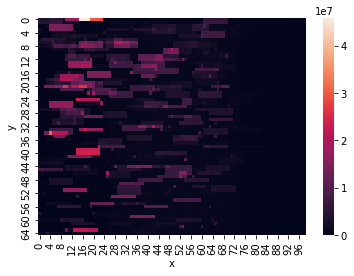

In [66]:
input_heatmap(df,0,0)

In [52]:
df[df['ftag_id']==0][df[df['ftag_id']==0]['hist_id']==0]['quality'].value_counts()

0    3782
1    2653
Name: quality, dtype: int64

In [54]:
for i in range(100):
    display(df[df['ftag_id']==0][df[df['ftag_id']==0]['hist_id']==0][0+(50*i):50*i+50])

,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
0,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,0,0.0,0,0,0,0
1,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,1,518732.0,0,0,0,1
2,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,2,951489.0,0,0,0,1
3,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,3,975142.0,0,0,0,1
4,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,4,0.0,0,0,0,0
5,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,5,0.0,0,0,0,0
6,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,6,0.0,0,0,0,0
7,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,7,0.0,0,0,0,0
8,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,8,0.0,0,0,0,0
9,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,9,57503.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
50,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,50,0.0,0,0,0,0
51,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,51,0.0,0,0,0,0
52,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,52,0.0,0,0,0,0
53,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,53,0.0,0,0,0,0
54,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,54,0.0,0,0,0,0
55,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,55,0.0,0,0,0,0
56,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,56,0.0,0,0,0,0
57,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,57,0.0,0,0,0,0
58,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,58,0.0,0,0,0,0
59,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,0,59,0.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
100,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,1,35,0.0,0,0,0,0
101,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,1,36,0.0,0,0,0,0
102,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,1,37,29.0,0,0,0,0
103,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,1,38,363.0,0,0,0,0
104,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,1,39,156.0,0,0,0,0
105,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,1,40,0.0,0,0,0,0
106,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,1,41,0.0,0,0,0,0
107,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,1,42,0.0,0,0,0,0
108,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,1,43,0.0,0,0,0,0
109,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,1,44,0.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
150,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,2,20,22142.0,0,0,0,0
151,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,2,21,56532.0,0,0,0,0
152,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,2,22,1334793.0,0,0,0,1
153,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,2,23,2345744.0,0,0,0,1
154,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,2,24,1442913.0,0,0,0,1
155,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,2,25,754407.0,0,0,0,1
156,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,2,26,63956.0,0,0,0,0
157,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,2,27,48194.0,0,0,0,0
158,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,2,28,13087.0,0,0,0,0
159,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,2,29,9414.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
200,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,5,43009.0,0,0,0,0
201,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,6,68577.0,0,0,0,0
202,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,7,102864.0,0,0,0,1
203,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,8,102811.0,0,0,0,1
204,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,9,104688.0,0,0,0,1
205,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,10,30999.0,0,0,0,0
206,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,11,2795904.0,0,0,0,1
207,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,12,10183341.0,0,0,0,1
208,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,13,2226165.0,0,0,0,1
209,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,14,56074.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
250,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,55,52571.0,0,0,0,0
251,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,56,3899936.0,0,0,0,1
252,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,57,3961292.0,0,0,0,1
253,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,58,78324.0,0,0,0,0
254,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,59,73593.0,0,0,0,0
255,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,60,53704.0,0,0,0,0
256,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,61,3000526.0,0,0,0,1
257,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,62,96724.0,0,0,0,0
258,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,63,5262420.0,0,0,0,1
259,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,3,64,46646.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
300,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,4,40,1512564.0,0,0,0,1
301,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,4,41,31444.0,0,0,0,0
302,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,4,42,36985.0,0,0,0,0
303,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,4,43,58089.0,0,0,0,0
304,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,4,44,58529.0,0,0,0,0
305,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,4,45,58620.0,0,0,0,0
306,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,4,46,79942.0,0,0,0,0
307,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,4,47,59641.0,0,0,0,0
308,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,4,48,5119079.0,0,0,0,1
309,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,4,49,787401.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
350,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,5,25,740059.0,0,0,0,1
351,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,5,26,37221.0,0,0,0,0
352,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,5,27,55470.0,0,0,0,0
353,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,5,28,8274863.0,0,0,0,1
354,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,5,29,16694.0,0,0,0,0
355,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,5,30,23788.0,0,0,0,0
356,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,5,31,6355189.0,0,0,0,1
357,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,5,32,6428904.0,0,0,0,1
358,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,5,33,115535.0,0,0,0,1
359,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,5,34,33979.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
400,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,10,28156.0,0,0,0,0
401,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,11,2776233.0,0,0,0,1
402,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,12,10147005.0,0,0,0,1
403,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,13,6467561.0,0,0,0,1
404,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,14,21044.0,0,0,0,0
405,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,15,21201.0,0,0,0,0
406,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,16,681908.0,0,0,0,1
407,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,17,693428.0,0,0,0,1
408,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,18,7409095.0,0,0,0,1
409,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,19,19924.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
450,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,60,49643.0,0,0,0,0
451,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,61,2945902.0,0,0,0,1
452,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,62,30659.0,0,0,0,0
453,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,63,5221092.0,0,0,0,1
454,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,6,64,19643.0,0,0,0,0
455,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,0,289353.0,0,0,0,1
456,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,1,832375.0,0,0,0,1
457,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,2,1034043.0,0,0,0,1
458,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,3,1821977.0,0,0,0,1
459,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,4,42305.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
500,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,45,32479.0,0,0,0,0
501,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,46,24440.0,0,0,0,0
502,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,47,40352.0,0,0,0,0
503,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,48,9251439.0,0,0,0,1
504,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,49,4940263.0,0,0,0,1
505,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,50,51059.0,0,0,0,0
506,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,51,37912.0,0,0,0,0
507,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,52,41228.0,0,0,0,0
508,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,53,9440675.0,0,0,0,1
509,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,7,54,2980271.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
550,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,8,30,23074.0,0,0,0,0
551,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,8,31,8709873.0,0,0,0,1
552,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,8,32,6778362.0,0,0,0,1
553,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,8,33,101606.0,0,0,0,1
554,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,8,34,35977.0,0,0,0,0
555,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,8,35,31486.0,0,0,0,0
556,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,8,36,14420845.0,0,0,0,1
557,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,8,37,7191763.0,0,0,0,1
558,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,8,38,81567.0,0,0,0,1
559,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,8,39,11207338.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
600,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,9,15,22484.0,0,0,0,0
601,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,9,16,682040.0,0,0,0,1
602,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,9,17,688549.0,0,0,0,1
603,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,9,18,7408069.0,0,0,0,1
604,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,9,19,20888.0,0,0,0,0
605,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,9,20,755264.0,0,0,0,1
606,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,9,21,5164229.0,0,0,0,1
607,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,9,22,2366749.0,0,0,0,1
608,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,9,23,7296932.0,0,0,0,1
609,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,9,24,5011584.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
650,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,0,289353.0,0,0,0,1
651,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,1,308968.0,0,0,0,1
652,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,2,65855.0,0,0,0,1
653,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,3,862204.0,0,0,0,1
654,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,4,6624470.0,0,0,0,1
655,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,5,8543991.0,0,0,0,1
656,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,6,16375989.0,0,0,0,1
657,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,7,14645954.0,0,0,0,1
658,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,8,1785384.0,0,0,0,1
659,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,9,1967790.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
700,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,50,12346781.0,0,0,0,1
701,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,51,12347221.0,0,0,0,1
702,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,52,33505.0,0,0,0,0
703,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,53,4546708.0,0,0,0,1
704,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,54,5970288.0,0,0,0,1
705,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,55,2897492.0,0,0,0,1
706,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,56,402165.0,0,0,0,1
707,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,57,74706.0,0,0,0,1
708,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,58,20452.0,0,0,0,0
709,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,10,59,30291.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
750,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,11,35,2212783.0,0,0,0,1
751,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,11,36,2032109.0,0,0,0,1
752,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,11,37,3743529.0,0,0,0,1
753,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,11,38,82354.0,0,0,0,1
754,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,11,39,37610.0,0,0,0,0
755,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,11,40,43857.0,0,0,0,0
756,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,11,41,15776.0,0,0,0,1
757,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,11,42,32759.0,0,0,0,1
758,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,11,43,1243928.0,0,0,0,1
759,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,11,44,1232216.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
800,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,12,20,785492.0,0,0,0,1
801,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,12,21,5200477.0,0,0,0,1
802,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,12,22,10445308.0,0,0,0,1
803,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,12,23,5007291.0,0,0,0,1
804,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,12,24,4023577.0,0,0,0,1
805,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,12,25,3326189.0,0,0,0,1
806,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,12,26,18513348.0,0,0,0,1
807,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,12,27,15208623.0,0,0,0,1
808,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,12,28,14708646.0,0,0,0,1
809,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,12,29,25878.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
850,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,5,8585490.0,0,0,0,1
851,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,6,3262663.0,0,0,0,1
852,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,7,903437.0,0,0,0,1
853,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,8,1807215.0,0,0,0,1
854,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,9,1982586.0,0,0,0,1
855,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,10,313081.0,0,0,0,1
856,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,11,2214157.0,0,0,0,1
857,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,12,115945.0,0,0,0,1
858,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,13,39289.0,0,0,0,0
859,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,14,42823.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
900,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,55,2937405.0,0,0,0,1
901,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,56,419523.0,0,0,0,1
902,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,57,8795640.0,0,0,0,1
903,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,58,24292.0,0,0,0,0
904,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,59,52408.0,0,0,0,0
905,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,60,53215.0,0,0,0,0
906,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,61,42455.0,0,0,0,0
907,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,62,41773.0,0,0,0,0
908,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,63,25518.0,0,0,0,0
909,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,13,64,24237.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
950,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,14,40,64260.0,0,0,0,0
951,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,14,41,65266.0,0,0,0,1
952,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,14,42,1104037.0,0,0,0,1
953,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,14,43,3449045.0,0,0,0,1
954,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,14,44,3248771.0,0,0,0,1
955,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,14,45,66649.0,0,0,0,0
956,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,14,46,1346788.0,0,0,0,1
957,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,14,47,1330896.0,0,0,0,1
958,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,14,48,477988.0,0,0,0,1
959,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,14,49,63897.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1000,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,15,25,3723529.0,0,0,0,1
1001,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,15,26,18547160.0,0,0,0,1
1002,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,15,27,15216971.0,0,0,0,1
1003,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,15,28,14740011.0,0,0,0,1
1004,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,15,29,76698.0,0,0,0,0
1005,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,15,30,49192.0,0,0,0,0
1006,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,15,31,2047756.0,0,0,0,1
1007,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,15,32,59809.0,0,0,0,0
1008,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,15,33,58141.0,0,0,0,0
1009,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,15,34,9268937.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1050,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,10,282595.0,0,0,0,1
1051,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,11,8936825.0,0,0,0,1
1052,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,12,6867931.0,0,0,0,1
1053,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,13,551544.0,0,0,0,1
1054,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,14,80444.0,0,0,0,0
1055,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,15,78891.0,0,0,0,0
1056,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,16,72543.0,0,0,0,0
1057,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,17,57450.0,0,0,0,0
1058,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,18,116435.0,0,0,0,1
1059,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,19,127015.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1100,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,60,14198465.0,0,0,0,1
1101,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,61,64757.0,0,0,0,0
1102,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,62,56479.0,0,0,0,0
1103,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,63,46964.0,0,0,0,0
1104,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,16,64,56887.0,0,0,0,0
1105,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,0,13982803.0,0,0,0,1
1106,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,1,3182852.0,0,0,0,1
1107,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,2,105780.0,0,0,0,0
1108,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,3,67984.0,0,0,0,0
1109,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,4,135667.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1150,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,45,120013.0,0,0,0,0
1151,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,46,1627104.0,0,0,0,1
1152,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,47,1368054.0,0,0,0,1
1153,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,48,514066.0,0,0,0,1
1154,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,49,664334.0,0,0,0,1
1155,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,50,60736.0,0,0,0,0
1156,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,51,68021.0,0,0,0,0
1157,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,52,67466.0,0,0,0,0
1158,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,53,126190.0,0,0,0,0
1159,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,17,54,1733866.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1200,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,18,30,148166.0,0,0,0,0
1201,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,18,31,3304456.0,0,0,0,1
1202,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,18,32,3344192.0,0,0,0,1
1203,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,18,33,1892903.0,0,0,0,1
1204,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,18,34,7219652.0,0,0,0,1
1205,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,18,35,6261492.0,0,0,0,1
1206,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,18,36,155414.0,0,0,0,0
1207,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,18,37,180085.0,0,0,0,0
1208,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,18,38,1542502.0,0,0,0,1
1209,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,18,39,165924.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1250,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,19,15,1527635.0,0,0,0,1
1251,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,19,16,1531971.0,0,0,0,1
1252,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,19,17,79471.0,0,0,0,0
1253,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,19,18,132559.0,0,0,0,1
1254,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,19,19,118762.0,0,0,0,1
1255,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,19,20,565821.0,0,0,0,1
1256,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,19,21,13621227.0,0,0,0,1
1257,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,19,22,9421926.0,0,0,0,1
1258,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,19,23,2494467.0,0,0,0,1
1259,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,19,24,8022434.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1300,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,0,14035846.0,0,0,0,1
1301,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,1,3201368.0,0,0,0,1
1302,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,2,91070.0,0,0,0,0
1303,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,3,84628.0,0,0,0,0
1304,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,4,92985.0,0,0,0,0
1305,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,5,90361.0,0,0,0,0
1306,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,6,8913243.0,0,0,0,1
1307,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,7,2745436.0,0,0,0,1
1308,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,8,2750836.0,0,0,0,1
1309,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,9,3864461.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1350,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,50,74690.0,0,0,0,0
1351,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,51,79289.0,0,0,0,0
1352,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,52,120311.0,0,0,0,1
1353,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,53,90463.0,0,0,0,0
1354,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,54,74729.0,0,0,0,0
1355,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,55,98081.0,0,0,0,0
1356,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,56,69441.0,0,0,0,0
1357,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,57,14471119.0,0,0,0,1
1358,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,58,92955.0,0,0,0,0
1359,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,20,59,106822.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1400,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,21,35,161305.0,0,0,0,1
1401,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,21,36,84384.0,0,0,0,0
1402,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,21,37,77974.0,0,0,0,0
1403,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,21,38,1452322.0,0,0,0,1
1404,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,21,39,80531.0,0,0,0,0
1405,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,21,40,93362.0,0,0,0,0
1406,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,21,41,84264.0,0,0,0,0
1407,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,21,42,7468707.0,0,0,0,1
1408,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,21,43,2061039.0,0,0,0,1
1409,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,21,44,2059119.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1450,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,22,20,4899185.0,0,0,0,1
1451,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,22,21,13116316.0,0,0,0,1
1452,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,22,22,59457.0,0,0,0,0
1453,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,22,23,2486222.0,0,0,0,1
1454,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,22,24,8020604.0,0,0,0,1
1455,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,22,25,8017817.0,0,0,0,1
1456,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,22,26,65114.0,0,0,0,0
1457,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,22,27,326598.0,0,0,0,1
1458,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,22,28,3025144.0,0,0,0,1
1459,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,22,29,5287556.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1500,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,5,73150.0,0,0,0,0
1501,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,6,8290091.0,0,0,0,1
1502,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,7,249851.0,0,0,0,1
1503,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,8,262824.0,0,0,0,1
1504,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,9,3854829.0,0,0,0,1
1505,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,10,3857386.0,0,0,0,1
1506,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,11,6803118.0,0,0,0,1
1507,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,12,6807704.0,0,0,0,1
1508,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,13,545794.0,0,0,0,1
1509,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,14,78303.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1550,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,55,79606.0,0,0,0,0
1551,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,56,70148.0,0,0,0,0
1552,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,57,5699228.0,0,0,0,1
1553,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,58,76316.0,0,0,0,0
1554,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,59,85355.0,0,0,0,0
1555,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,60,66422.0,0,0,0,0
1556,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,61,1435994.0,0,0,0,1
1557,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,62,3764812.0,0,0,0,1
1558,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,63,93411.0,0,0,0,0
1559,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,23,64,70579.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1600,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,24,40,118847.0,0,0,0,0
1601,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,24,41,102410.0,0,0,0,0
1602,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,24,42,1023549.0,0,0,0,1
1603,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,24,43,115813.0,0,0,0,0
1604,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,24,44,340771.0,0,0,0,1
1605,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,24,45,104093.0,0,0,0,0
1606,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,24,46,334764.0,0,0,0,1
1607,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,24,47,368920.0,0,0,0,1
1608,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,24,48,369061.0,0,0,0,1
1609,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,24,49,83164.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1650,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,25,25,3298666.0,0,0,0,1
1651,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,25,26,406086.0,0,0,0,0
1652,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,25,27,684805.0,0,0,0,1
1653,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,25,28,914997.0,0,0,0,1
1654,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,25,29,5659107.0,0,0,0,1
1655,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,25,30,581447.0,0,0,0,1
1656,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,25,31,513406.0,0,0,0,1
1657,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,25,32,522426.0,0,0,0,1
1658,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,25,33,2097233.0,0,0,0,1
1659,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,25,34,415678.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1700,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,10,627554.0,0,0,0,0
1701,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,11,1100327.0,0,0,0,1
1702,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,12,3475615.0,0,0,0,1
1703,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,13,610273.0,0,0,0,0
1704,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,14,653286.0,0,0,0,0
1705,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,15,1747420.0,0,0,0,1
1706,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,16,1805715.0,0,0,0,1
1707,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,17,645166.0,0,0,0,0
1708,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,18,1110965.0,0,0,0,1
1709,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,19,614592.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1750,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,60,649994.0,0,0,0,0
1751,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,61,627044.0,0,0,0,0
1752,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,62,611273.0,0,0,0,0
1753,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,63,613439.0,0,0,0,0
1754,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,26,64,646742.0,0,0,0,0
1755,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,0,1363748.0,0,0,0,1
1756,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,1,3405011.0,0,0,0,1
1757,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,2,2726585.0,0,0,0,1
1758,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,3,4784993.0,0,0,0,1
1759,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,4,4789932.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1800,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,45,2934690.0,0,0,0,1
1801,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,46,2917185.0,0,0,0,1
1802,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,47,898299.0,0,0,0,1
1803,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,48,4554835.0,0,0,0,1
1804,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,49,617984.0,0,0,0,0
1805,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,50,584677.0,0,0,0,0
1806,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,51,594463.0,0,0,0,0
1807,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,52,670360.0,0,0,0,1
1808,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,53,597642.0,0,0,0,0
1809,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,27,54,593715.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1850,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,28,30,781626.0,0,0,0,1
1851,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,28,31,691642.0,0,0,0,1
1852,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,28,32,665518.0,0,0,0,0
1853,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,28,33,616059.0,0,0,0,0
1854,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,28,34,590664.0,0,0,0,0
1855,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,28,35,599724.0,0,0,0,0
1856,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,28,36,11311316.0,0,0,0,1
1857,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,28,37,7960393.0,0,0,0,1
1858,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,28,38,1704397.0,0,0,0,1
1859,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,28,39,1003814.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1900,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,29,15,590022.0,0,0,0,0
1901,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,29,16,584158.0,0,0,0,0
1902,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,29,17,593584.0,0,0,0,0
1903,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,29,18,1100545.0,0,0,0,1
1904,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,29,19,1112184.0,0,0,0,1
1905,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,29,20,615556.0,0,0,0,0
1906,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,29,21,10541521.0,0,0,0,1
1907,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,29,22,2168304.0,0,0,0,1
1908,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,29,23,4208790.0,0,0,0,1
1909,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,29,24,568253.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
1950,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,0,1363748.0,0,0,0,1
1951,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,1,3440531.0,0,0,0,1
1952,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,2,3008284.0,0,0,0,1
1953,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,3,5035912.0,0,0,0,1
1954,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,4,4883858.0,0,0,0,1
1955,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,5,761011.0,0,0,0,0
1956,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,6,699383.0,0,0,0,0
1957,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,7,729747.0,0,0,0,0
1958,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,8,738380.0,0,0,0,1
1959,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,9,777019.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2000,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,50,686250.0,0,0,0,0
2001,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,51,701938.0,0,0,0,0
2002,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,52,727499.0,0,0,0,0
2003,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,53,708904.0,0,0,0,0
2004,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,54,689873.0,0,0,0,0
2005,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,55,701684.0,0,0,0,0
2006,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,56,660145.0,0,0,0,0
2007,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,57,679004.0,0,0,0,0
2008,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,58,725200.0,0,0,0,0
2009,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,30,59,693991.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2050,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,31,35,695099.0,0,0,0,0
2051,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,31,36,11389365.0,0,0,0,1
2052,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,31,37,991785.0,0,0,0,1
2053,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,31,38,1739476.0,0,0,0,1
2054,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,31,39,1099792.0,0,0,0,1
2055,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,31,40,1408972.0,0,0,0,1
2056,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,31,41,1382667.0,0,0,0,1
2057,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,31,42,662376.0,0,0,0,0
2058,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,31,43,735212.0,0,0,0,0
2059,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,31,44,733433.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2100,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,32,20,767837.0,0,0,0,0
2101,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,32,21,17433340.0,0,0,0,1
2102,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,32,22,3080648.0,0,0,0,1
2103,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,32,23,5160044.0,0,0,0,1
2104,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,32,24,755991.0,0,0,0,0
2105,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,32,25,3789772.0,0,0,0,1
2106,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,32,26,979613.0,0,0,0,1
2107,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,32,27,769490.0,0,0,0,0
2108,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,32,28,785573.0,0,0,0,0
2109,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,32,29,4847959.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2150,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,5,752932.0,0,0,0,0
2151,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,6,751608.0,0,0,0,0
2152,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,7,684850.0,0,0,0,0
2153,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,8,777709.0,0,0,0,1
2154,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,9,1929374.0,0,0,0,1
2155,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,10,1826082.0,0,0,0,1
2156,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,11,2321484.0,0,0,0,1
2157,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,12,3779111.0,0,0,0,1
2158,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,13,12357884.0,0,0,0,1
2159,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,14,12001843.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2200,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,55,681694.0,0,0,0,0
2201,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,56,707320.0,0,0,0,0
2202,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,57,1201448.0,0,0,0,1
2203,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,58,1154728.0,0,0,0,1
2204,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,59,740679.0,0,0,0,0
2205,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,60,703285.0,0,0,0,0
2206,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,61,765806.0,0,0,0,0
2207,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,62,762607.0,0,0,0,0
2208,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,63,717245.0,0,0,0,0
2209,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,33,64,635352.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2250,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,34,40,1012486.0,0,0,0,1
2251,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,34,41,3393104.0,0,0,0,1
2252,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,34,42,6966416.0,0,0,0,1
2253,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,34,43,1884763.0,0,0,0,1
2254,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,34,44,757266.0,0,0,0,0
2255,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,34,45,3632121.0,0,0,0,1
2256,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,34,46,3092917.0,0,0,0,1
2257,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,34,47,752101.0,0,0,0,0
2258,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,34,48,804660.0,0,0,0,0
2259,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,34,49,804898.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2300,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,35,25,3295930.0,0,0,0,1
2301,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,35,26,662149.0,0,0,0,1
2302,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,35,27,11105038.0,0,0,0,1
2303,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,35,28,635587.0,0,0,0,0
2304,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,35,29,4707512.0,0,0,0,1
2305,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,35,30,3429228.0,0,0,0,1
2306,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,35,31,1388157.0,0,0,0,1
2307,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,35,32,586551.0,0,0,0,0
2308,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,35,33,624964.0,0,0,0,0
2309,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,35,34,653493.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2350,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,10,1767747.0,0,0,0,1
2351,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,11,1775341.0,0,0,0,1
2352,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,12,4868870.0,0,0,0,1
2353,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,13,14163715.0,0,0,0,1
2354,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,14,11892526.0,0,0,0,1
2355,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,15,675931.0,0,0,0,0
2356,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,16,682441.0,0,0,0,0
2357,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,17,607397.0,0,0,0,0
2358,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,18,5620227.0,0,0,0,1
2359,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,19,11604161.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2400,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,60,691354.0,0,0,0,0
2401,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,61,693358.0,0,0,0,0
2402,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,62,696545.0,0,0,0,0
2403,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,63,670730.0,0,0,0,0
2404,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,36,64,591856.0,0,0,0,0
2405,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,0,4812669.0,0,0,0,1
2406,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,1,5506375.0,0,0,0,1
2407,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,2,826556.0,0,0,0,0
2408,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,3,12121307.0,0,0,0,1
2409,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,4,12144600.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2450,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,45,1367561.0,0,0,0,1
2451,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,46,761655.0,0,0,0,0
2452,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,47,1830950.0,0,0,0,1
2453,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,48,836488.0,0,0,0,0
2454,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,49,2219216.0,0,0,0,1
2455,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,50,7086957.0,0,0,0,1
2456,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,51,6488310.0,0,0,0,1
2457,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,52,821230.0,0,0,0,0
2458,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,53,786037.0,0,0,0,0
2459,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,37,54,813990.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2500,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,38,30,4634804.0,0,0,0,1
2501,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,38,31,1598660.0,0,0,0,1
2502,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,38,32,752419.0,0,0,0,0
2503,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,38,33,11232478.0,0,0,0,1
2504,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,38,34,901119.0,0,0,0,0
2505,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,38,35,893100.0,0,0,0,0
2506,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,38,36,892611.0,0,0,0,0
2507,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,38,37,1256703.0,0,0,0,1
2508,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,38,38,921719.0,0,0,0,0
2509,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,38,39,905958.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2550,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,39,15,781060.0,0,0,0,0
2551,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,39,16,3869847.0,0,0,0,1
2552,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,39,17,861880.0,0,0,0,0
2553,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,39,18,5900408.0,0,0,0,1
2554,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,39,19,11972714.0,0,0,0,1
2555,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,39,20,8722868.0,0,0,0,1
2556,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,39,21,12589580.0,0,0,0,1
2557,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,39,22,22156616.0,0,0,0,1
2558,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,39,23,14176011.0,0,0,0,1
2559,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,39,24,890873.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2600,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,0,2133099.0,0,0,0,1
2601,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,1,2918105.0,0,0,0,1
2602,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,2,853925.0,0,0,0,0
2603,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,3,853781.0,0,0,0,0
2604,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,4,839405.0,0,0,0,0
2605,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,5,11478141.0,0,0,0,1
2606,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,6,10551346.0,0,0,0,1
2607,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,7,846644.0,0,0,0,0
2608,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,8,1291711.0,0,0,0,1
2609,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,9,3193205.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2650,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,50,7012390.0,0,0,0,1
2651,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,51,6539847.0,0,0,0,1
2652,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,52,831791.0,0,0,0,0
2653,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,53,809455.0,0,0,0,0
2654,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,54,786729.0,0,0,0,0
2655,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,55,874801.0,0,0,0,0
2656,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,56,834814.0,0,0,0,0
2657,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,57,836159.0,0,0,0,0
2658,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,58,854924.0,0,0,0,0
2659,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,40,59,1088886.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2700,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,41,35,818957.0,0,0,0,0
2701,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,41,36,803187.0,0,0,0,0
2702,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,41,37,846578.0,0,0,0,0
2703,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,41,38,836671.0,0,0,0,0
2704,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,41,39,857335.0,0,0,0,0
2705,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,41,40,801402.0,0,0,0,0
2706,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,41,41,3686855.0,0,0,0,1
2707,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,41,42,13837739.0,0,0,0,1
2708,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,41,43,784498.0,0,0,0,0
2709,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,41,44,774732.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2750,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,42,20,864884.0,0,0,0,1
2751,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,42,21,3273496.0,0,0,0,1
2752,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,42,22,15781493.0,0,0,0,1
2753,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,42,23,13419641.0,0,0,0,1
2754,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,42,24,897357.0,0,0,0,1
2755,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,42,25,3474794.0,0,0,0,1
2756,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,42,26,1745299.0,0,0,0,1
2757,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,42,27,11389888.0,0,0,0,1
2758,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,42,28,1349712.0,0,0,0,1
2759,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,42,29,897175.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2800,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,5,12796941.0,0,0,0,1
2801,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,6,11891735.0,0,0,0,1
2802,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,7,882554.0,0,0,0,0
2803,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,8,1919813.0,0,0,0,1
2804,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,9,3806194.0,0,0,0,1
2805,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,10,3349630.0,0,0,0,1
2806,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,11,703142.0,0,0,0,0
2807,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,12,705436.0,0,0,0,0
2808,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,13,927290.0,0,0,0,1
2809,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,14,1967058.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2850,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,55,905842.0,0,0,0,0
2851,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,56,878453.0,0,0,0,0
2852,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,57,7331484.0,0,0,0,1
2853,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,58,881345.0,0,0,0,0
2854,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,59,1168917.0,0,0,0,1
2855,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,60,8136326.0,0,0,0,1
2856,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,61,874537.0,0,0,0,0
2857,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,62,859048.0,0,0,0,0
2858,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,63,877707.0,0,0,0,0
2859,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,43,64,815761.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2900,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,44,40,874440.0,0,0,0,0
2901,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,44,41,1314456.0,0,0,0,1
2902,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,44,42,7694788.0,0,0,0,1
2903,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,44,43,899330.0,0,0,0,0
2904,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,44,44,7919806.0,0,0,0,1
2905,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,44,45,836961.0,0,0,0,0
2906,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,44,46,841400.0,0,0,0,0
2907,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,44,47,828738.0,0,0,0,0
2908,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,44,48,5068091.0,0,0,0,1
2909,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,44,49,884534.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
2950,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,45,25,1879239.0,0,0,0,1
2951,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,45,26,866699.0,0,0,0,0
2952,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,45,27,960980.0,0,0,0,1
2953,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,45,28,1383986.0,0,0,0,1
2954,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,45,29,7547287.0,0,0,0,1
2955,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,45,30,862275.0,0,0,0,0
2956,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,45,31,852218.0,0,0,0,0
2957,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,45,32,1102419.0,0,0,0,1
2958,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,45,33,1059941.0,0,0,0,1
2959,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,45,34,11160326.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3000,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,10,3357009.0,0,0,0,1
3001,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,11,1513886.0,0,0,0,1
3002,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,12,1528692.0,0,0,0,1
3003,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,13,346885.0,0,0,0,0
3004,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,14,1451571.0,0,0,0,1
3005,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,15,1908878.0,0,0,0,1
3006,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,16,3889515.0,0,0,0,1
3007,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,17,5741978.0,0,0,0,1
3008,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,18,8478902.0,0,0,0,1
3009,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,19,4171367.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3050,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,60,4567700.0,0,0,0,1
3051,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,61,800926.0,0,0,0,0
3052,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,62,793364.0,0,0,0,0
3053,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,63,821926.0,0,0,0,0
3054,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,46,64,776431.0,0,0,0,0
3055,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,0,0.0,0,0,0,0
3056,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,1,784833.0,0,0,0,0
3057,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,2,853166.0,0,0,0,0
3058,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,3,4895880.0,0,0,0,1
3059,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,4,8726410.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3100,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,45,847886.0,0,0,0,0
3101,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,46,850798.0,0,0,0,0
3102,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,47,723967.0,0,0,0,0
3103,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,48,4999089.0,0,0,0,1
3104,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,49,849661.0,0,0,0,0
3105,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,50,857089.0,0,0,0,0
3106,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,51,865727.0,0,0,0,0
3107,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,52,6907914.0,0,0,0,1
3108,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,53,1289124.0,0,0,0,1
3109,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,47,54,840929.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3150,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,48,30,708303.0,0,0,0,0
3151,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,48,31,831220.0,0,0,0,0
3152,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,48,32,3249097.0,0,0,0,1
3153,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,48,33,1087029.0,0,0,0,1
3154,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,48,34,11184499.0,0,0,0,1
3155,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,48,35,11224370.0,0,0,0,1
3156,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,48,36,864214.0,0,0,0,0
3157,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,48,37,851588.0,0,0,0,0
3158,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,48,38,1524672.0,0,0,0,1
3159,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,48,39,861091.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3200,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,49,15,743361.0,0,0,0,0
3201,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,49,16,714795.0,0,0,0,0
3202,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,49,17,820650.0,0,0,0,0
3203,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,49,18,3588741.0,0,0,0,1
3204,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,49,19,4197864.0,0,0,0,1
3205,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,49,20,8572608.0,0,0,0,1
3206,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,49,21,8009261.0,0,0,0,1
3207,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,49,22,837487.0,0,0,0,0
3208,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,49,23,827965.0,0,0,0,0
3209,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,49,24,833500.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3250,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,0,0.0,0,0,0,0
3251,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,1,777018.0,0,0,0,0
3252,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,2,7727267.0,0,0,0,1
3253,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,3,4966557.0,0,0,0,1
3254,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,4,8715223.0,0,0,0,1
3255,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,5,11252857.0,0,0,0,1
3256,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,6,7415395.0,0,0,0,1
3257,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,7,6793866.0,0,0,0,1
3258,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,8,3763074.0,0,0,0,1
3259,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,9,1408265.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3300,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,50,859959.0,0,0,0,0
3301,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,51,848683.0,0,0,0,0
3302,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,52,853722.0,0,0,0,0
3303,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,53,1098727.0,0,0,0,1
3304,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,54,649663.0,0,0,0,0
3305,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,55,824912.0,0,0,0,0
3306,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,56,817645.0,0,0,0,0
3307,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,57,7304119.0,0,0,0,1
3308,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,58,861236.0,0,0,0,0
3309,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,50,59,6120356.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3350,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,51,35,11207842.0,0,0,0,1
3351,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,51,36,838608.0,0,0,0,0
3352,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,51,37,808097.0,0,0,0,0
3353,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,51,38,817107.0,0,0,0,0
3354,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,51,39,823126.0,0,0,0,0
3355,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,51,40,1264798.0,0,0,0,1
3356,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,51,41,904882.0,0,0,0,1
3357,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,51,42,871329.0,0,0,0,0
3358,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,51,43,853509.0,0,0,0,0
3359,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,51,44,7893594.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3400,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,52,20,12956327.0,0,0,0,1
3401,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,52,21,12130809.0,0,0,0,1
3402,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,52,22,4946015.0,0,0,0,1
3403,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,52,23,852514.0,0,0,0,0
3404,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,52,24,852729.0,0,0,0,0
3405,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,52,25,1892777.0,0,0,0,1
3406,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,52,26,875096.0,0,0,0,0
3407,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,52,27,905295.0,0,0,0,1
3408,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,52,28,917561.0,0,0,0,1
3409,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,52,29,864333.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3450,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,5,9912060.0,0,0,0,1
3451,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,6,6109687.0,0,0,0,1
3452,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,7,6850914.0,0,0,0,1
3453,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,8,3185638.0,0,0,0,1
3454,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,9,829503.0,0,0,0,0
3455,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,10,10806498.0,0,0,0,1
3456,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,11,11472259.0,0,0,0,1
3457,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,12,1529045.0,0,0,0,1
3458,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,13,814606.0,0,0,0,0
3459,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,14,844678.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3500,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,55,838541.0,0,0,0,0
3501,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,56,833963.0,0,0,0,0
3502,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,57,4955283.0,0,0,0,1
3503,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,58,857934.0,0,0,0,0
3504,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,59,1455126.0,0,0,0,1
3505,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,60,1744093.0,0,0,0,1
3506,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,61,791584.0,0,0,0,0
3507,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,62,809415.0,0,0,0,0
3508,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,63,823051.0,0,0,0,0
3509,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,53,64,736400.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3550,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,54,40,1300567.0,0,0,0,1
3551,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,54,41,878140.0,0,0,0,1
3552,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,54,42,2087293.0,0,0,0,1
3553,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,54,43,8590554.0,0,0,0,1
3554,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,54,44,2257792.0,0,0,0,1
3555,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,54,45,853621.0,0,0,0,0
3556,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,54,46,854056.0,0,0,0,0
3557,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,54,47,859395.0,0,0,0,0
3558,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,54,48,858122.0,0,0,0,0
3559,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,54,49,867416.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3600,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,55,25,8103844.0,0,0,0,1
3601,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,55,26,11379262.0,0,0,0,1
3602,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,55,27,863276.0,0,0,0,0
3603,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,55,28,867304.0,0,0,0,0
3604,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,55,29,863286.0,0,0,0,0
3605,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,55,30,1209497.0,0,0,0,1
3606,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,55,31,10812396.0,0,0,0,1
3607,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,55,32,577990.0,0,0,0,0
3608,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,55,33,840570.0,0,0,0,0
3609,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,55,34,883238.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3650,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,10,2300279.0,0,0,0,1
3651,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,11,2299157.0,0,0,0,1
3652,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,12,2504116.0,0,0,0,1
3653,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,13,839297.0,0,0,0,0
3654,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,14,857123.0,0,0,0,0
3655,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,15,1210087.0,0,0,0,1
3656,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,16,850056.0,0,0,0,0
3657,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,17,855266.0,0,0,0,0
3658,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,18,2035112.0,0,0,0,1
3659,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,19,15241998.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3700,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,60,1828901.0,0,0,0,1
3701,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,61,886361.0,0,0,0,0
3702,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,62,904716.0,0,0,0,0
3703,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,63,847183.0,0,0,0,0
3704,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,56,64,703799.0,0,0,0,0
3705,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,0,3711915.0,0,0,0,1
3706,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,1,4474748.0,0,0,0,1
3707,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,2,5785021.0,0,0,0,1
3708,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,3,2072032.0,0,0,0,1
3709,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,4,876273.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3750,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,45,716216.0,0,0,0,0
3751,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,46,713824.0,0,0,0,0
3752,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,47,872355.0,0,0,0,0
3753,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,48,893330.0,0,0,0,0
3754,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,49,899573.0,0,0,0,0
3755,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,50,907140.0,0,0,0,0
3756,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,51,894049.0,0,0,0,0
3757,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,52,1436739.0,0,0,0,1
3758,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,53,5128630.0,0,0,0,1
3759,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,57,54,5133546.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3800,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,58,30,1119142.0,0,0,0,1
3801,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,58,31,10947057.0,0,0,0,1
3802,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,58,32,702053.0,0,0,0,0
3803,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,58,33,795548.0,0,0,0,0
3804,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,58,34,833739.0,0,0,0,0
3805,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,58,35,1091531.0,0,0,0,1
3806,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,58,36,1083108.0,0,0,0,1
3807,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,58,37,711184.0,0,0,0,0
3808,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,58,38,799325.0,0,0,0,0
3809,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,58,39,884748.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3850,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,59,15,1230299.0,0,0,0,1
3851,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,59,16,860977.0,0,0,0,0
3852,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,59,17,1322941.0,0,0,0,1
3853,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,59,18,2312573.0,0,0,0,1
3854,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,59,19,1821747.0,0,0,0,1
3855,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,59,20,4250943.0,0,0,0,1
3856,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,59,21,6045332.0,0,0,0,1
3857,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,59,22,869707.0,0,0,0,0
3858,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,59,23,873137.0,0,0,0,0
3859,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,59,24,13710037.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3900,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,0,3711915.0,0,0,0,1
3901,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,1,4490030.0,0,0,0,1
3902,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,2,5781683.0,0,0,0,1
3903,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,3,2037501.0,0,0,0,1
3904,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,4,1716351.0,0,0,0,1
3905,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,5,8956844.0,0,0,0,1
3906,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,6,11169817.0,0,0,0,1
3907,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,7,3020849.0,0,0,0,1
3908,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,8,796100.0,0,0,0,0
3909,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,9,12672014.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
3950,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,50,908340.0,0,0,0,0
3951,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,51,809338.0,0,0,0,0
3952,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,52,804004.0,0,0,0,0
3953,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,53,5082541.0,0,0,0,1
3954,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,54,5114120.0,0,0,0,1
3955,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,55,854307.0,0,0,0,0
3956,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,56,833004.0,0,0,0,0
3957,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,57,817017.0,0,0,0,0
3958,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,58,861754.0,0,0,0,0
3959,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,60,59,1472348.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4000,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,61,35,5718466.0,0,0,0,1
4001,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,61,36,5706053.0,0,0,0,1
4002,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,61,37,921113.0,0,0,0,0
4003,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,61,38,921930.0,0,0,0,0
4004,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,61,39,968374.0,0,0,0,1
4005,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,61,40,944313.0,0,0,0,1
4006,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,61,41,1376911.0,0,0,0,1
4007,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,61,42,2152987.0,0,0,0,1
4008,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,61,43,2139968.0,0,0,0,1
4009,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,61,44,923955.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4050,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,62,20,3819115.0,0,0,0,1
4051,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,62,21,5957952.0,0,0,0,1
4052,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,62,22,810988.0,0,0,0,0
4053,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,62,23,779901.0,0,0,0,0
4054,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,62,24,1355775.0,0,0,0,1
4055,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,62,25,2645137.0,0,0,0,1
4056,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,62,26,11317412.0,0,0,0,1
4057,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,62,27,863556.0,0,0,0,0
4058,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,62,28,811822.0,0,0,0,0
4059,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,62,29,2660218.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4100,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,5,8801884.0,0,0,0,1
4101,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,6,8796951.0,0,0,0,1
4102,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,7,706655.0,0,0,0,0
4103,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,8,3193098.0,0,0,0,1
4104,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,9,14952725.0,0,0,0,1
4105,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,10,632779.0,0,0,0,0
4106,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,11,1260145.0,0,0,0,1
4107,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,12,638003.0,0,0,0,0
4108,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,13,603959.0,0,0,0,0
4109,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,14,3070635.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4150,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,55,714943.0,0,0,0,0
4151,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,56,699956.0,0,0,0,0
4152,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,57,711395.0,0,0,0,0
4153,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,58,713765.0,0,0,0,0
4154,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,59,1309801.0,0,0,0,1
4155,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,60,747292.0,0,0,0,1
4156,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,61,701809.0,0,0,0,0
4157,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,62,693029.0,0,0,0,0
4158,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,63,696962.0,0,0,0,1
4159,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,63,64,634518.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4200,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,64,40,713951.0,0,0,0,1
4201,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,64,41,644275.0,0,0,0,0
4202,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,64,42,606140.0,0,0,0,0
4203,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,64,43,683045.0,0,0,0,0
4204,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,64,44,652863.0,0,0,0,0
4205,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,64,45,640336.0,0,0,0,0
4206,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,64,46,649018.0,0,0,0,0
4207,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,64,47,623756.0,0,0,0,0
4208,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,64,48,672764.0,0,0,0,0
4209,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,64,49,654461.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4250,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,65,25,1316401.0,0,0,0,1
4251,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,65,26,728629.0,0,0,0,0
4252,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,65,27,759287.0,0,0,0,0
4253,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,65,28,719928.0,0,0,0,0
4254,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,65,29,2528452.0,0,0,0,1
4255,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,65,30,709518.0,0,0,0,0
4256,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,65,31,717796.0,0,0,0,0
4257,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,65,32,5431825.0,0,0,0,1
4258,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,65,33,689995.0,0,0,0,0
4259,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,65,34,731720.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4300,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,10,740445.0,0,0,0,0
4301,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,11,1568113.0,0,0,0,1
4302,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,12,725827.0,0,0,0,0
4303,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,13,725485.0,0,0,0,0
4304,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,14,3219398.0,0,0,0,1
4305,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,15,6893626.0,0,0,0,1
4306,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,16,1217881.0,0,0,0,1
4307,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,17,1276181.0,0,0,0,1
4308,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,18,2198137.0,0,0,0,1
4309,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,19,1777057.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4350,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,60,738967.0,0,0,0,0
4351,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,61,742927.0,0,0,0,0
4352,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,62,732490.0,0,0,0,0
4353,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,63,724925.0,0,0,0,1
4354,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,66,64,676758.0,0,0,0,0
4355,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,0,0.0,0,0,0,0
4356,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,1,686619.0,0,0,0,0
4357,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,2,7367225.0,0,0,0,1
4358,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,3,4905797.0,0,0,0,1
4359,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,4,771356.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4400,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,45,778412.0,0,0,0,0
4401,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,46,771288.0,0,0,0,0
4402,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,47,777941.0,0,0,0,0
4403,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,48,780298.0,0,0,0,0
4404,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,49,819407.0,0,0,0,0
4405,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,50,778048.0,0,0,0,0
4406,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,51,759724.0,0,0,0,0
4407,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,52,777570.0,0,0,0,0
4408,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,53,758720.0,0,0,0,0
4409,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,67,54,794685.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4450,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,68,30,675141.0,0,0,0,0
4451,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,68,31,690345.0,0,0,0,0
4452,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,68,32,5441567.0,0,0,0,1
4453,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,68,33,598361.0,0,0,0,0
4454,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,68,34,2428272.0,0,0,0,1
4455,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,68,35,9946490.0,0,0,0,1
4456,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,68,36,5217971.0,0,0,0,1
4457,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,68,37,681916.0,0,0,0,0
4458,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,68,38,4049425.0,0,0,0,1
4459,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,68,39,702313.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4500,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,69,15,2125341.0,0,0,0,1
4501,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,69,16,876404.0,0,0,0,1
4502,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,69,17,729246.0,0,0,0,0
4503,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,69,18,727728.0,0,0,0,0
4504,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,69,19,730596.0,0,0,0,0
4505,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,69,20,750461.0,0,0,0,0
4506,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,69,21,725991.0,0,0,0,0
4507,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,69,22,714657.0,0,0,0,0
4508,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,69,23,649303.0,0,0,0,0
4509,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,69,24,638877.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4550,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,0,0.0,0,0,0,0
4551,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,1,574927.0,0,0,0,0
4552,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,2,7232208.0,0,0,0,1
4553,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,3,4732715.0,0,0,0,1
4554,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,4,2714630.0,0,0,0,1
4555,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,5,2696865.0,0,0,0,1
4556,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,6,605014.0,0,0,0,0
4557,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,7,586241.0,0,0,0,0
4558,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,8,3026364.0,0,0,0,1
4559,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,9,3014537.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4600,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,50,592697.0,0,0,0,0
4601,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,51,615162.0,0,0,0,0
4602,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,52,623543.0,0,0,0,0
4603,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,53,599943.0,0,0,0,0
4604,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,54,596886.0,0,0,0,0
4605,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,55,577828.0,0,0,0,0
4606,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,56,584532.0,0,0,0,0
4607,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,57,558646.0,0,0,0,0
4608,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,58,608637.0,0,0,0,0
4609,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,70,59,595741.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4650,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,71,35,5081050.0,0,0,0,1
4651,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,71,36,375179.0,0,0,0,0
4652,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,71,37,2307967.0,0,0,0,1
4653,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,71,38,4015140.0,0,0,0,1
4654,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,71,39,605870.0,0,0,0,0
4655,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,71,40,591248.0,0,0,0,0
4656,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,71,41,579555.0,0,0,0,0
4657,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,71,42,577368.0,0,0,0,0
4658,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,71,43,679643.0,0,0,0,1
4659,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,71,44,579519.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4700,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,72,20,651866.0,0,0,0,0
4701,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,72,21,637563.0,0,0,0,0
4702,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,72,22,613758.0,0,0,0,0
4703,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,72,23,641599.0,0,0,0,0
4704,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,72,24,620767.0,0,0,0,0
4705,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,72,25,626184.0,0,0,0,0
4706,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,72,26,638295.0,0,0,0,0
4707,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,72,27,622876.0,0,0,0,0
4708,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,72,28,632907.0,0,0,0,0
4709,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,72,29,673402.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4750,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,5,593230.0,0,0,0,0
4751,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,6,574248.0,0,0,0,0
4752,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,7,591823.0,0,0,0,0
4753,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,8,601572.0,0,0,0,0
4754,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,9,629975.0,0,0,0,0
4755,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,10,630587.0,0,0,0,0
4756,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,11,826617.0,0,0,0,1
4757,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,12,641594.0,0,0,0,0
4758,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,13,553648.0,0,0,0,0
4759,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,14,577215.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4800,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,55,636836.0,0,0,0,0
4801,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,56,1025320.0,0,0,0,1
4802,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,57,630157.0,0,0,0,0
4803,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,58,585189.0,0,0,0,0
4804,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,59,613643.0,0,0,0,0
4805,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,60,651547.0,0,0,0,0
4806,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,61,622909.0,0,0,0,0
4807,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,62,604907.0,0,0,0,0
4808,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,63,616188.0,0,0,0,0
4809,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,73,64,643540.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4850,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,74,40,584970.0,0,0,0,1
4851,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,74,41,513292.0,0,0,0,1
4852,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,74,42,406490.0,0,0,0,0
4853,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,74,43,323565.0,0,0,0,1
4854,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,74,44,244141.0,0,0,0,0
4855,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,74,45,406184.0,0,0,0,0
4856,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,74,46,389132.0,0,0,0,0
4857,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,74,47,530823.0,0,0,0,1
4858,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,74,48,341158.0,0,0,0,0
4859,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,74,49,423870.0,0,0,0,0


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4900,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,75,25,93606.0,0,0,0,0
4901,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,75,26,102287.0,0,0,0,0
4902,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,75,27,99084.0,0,0,0,0
4903,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,75,28,364601.0,0,0,0,1
4904,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,75,29,362664.0,0,0,0,1
4905,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,75,30,565874.0,0,0,0,1
4906,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,75,31,305931.0,0,0,0,1
4907,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,75,32,108252.0,0,0,0,0
4908,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,75,33,105320.0,0,0,0,0
4909,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,75,34,1884241.0,0,0,0,1


,paths,x,y,occ,ftag_id,hist_type,hist_id,quality
4950,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,76,10,79661.0,0,0,0,0
4951,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,76,11,68270.0,0,0,0,0
4952,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,76,12,76245.0,0,0,0,0
4953,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,76,13,63261.0,0,0,0,0
4954,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,76,14,70493.0,0,0,0,0
4955,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,76,15,66492.0,0,0,0,0
4956,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,76,16,80021.0,0,0,0,0
4957,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,76,17,1775223.0,0,0,0,1
4958,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,76,18,1781919.0,0,0,0,1
4959,run_363664/CaloMonitoring/ClusterMon/CaloCalTo...,76,19,72050.0,0,0,0,0
